# Importing libraries and dataset

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset

salary = pd.read_csv('Desktop/ds_salaries.csv')

In [4]:
#Checking it imported correctly

salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 1. Which role has the highest salary employment wise?

In [5]:
#Finding the average salary by role

average_salary_by_role = salary.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

print(average_salary_by_role)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

# 2. Which employment types do employers prefer to hire?

In [6]:
#Counting the different employment types

employment_counts = salary['employment_type'].value_counts()

print(employment_counts)

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


# 3. Which role are entry leveled generally hired for?

In [8]:
#Storing variable for entry level

entry_level_criteria = ['EN']

# Filtering the data for entry-level positions based on job title

entry_level_data = salary[salary['job_title'].str.contains('|'.join(entry_level_criteria), case=False)]

# Analyzing the distribution of roles in the entry-level data

role_distribution = entry_level_data['job_title'].value_counts()

print(role_distribution)

Data Scientist                              143
Data Engineer                               132
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Principal Data Scientist                      7
Director of Data Science                      7
Data Science Consultant                       7
ML Engineer                                   6
Computer Vision Engineer                      6
Lead Data Engineer                            6
Applied Data Scientist                        5
Data Engineering Manager                      5
Head of Data Science                          4
Data Analytics Engineer                       4
Analytics Engineer                            4
Applied Machine Learning Scientist            4
Machine Learning Infrastructure Engineer

# 4. Which countries pay the highest for which roles?

In [9]:
# Grouping the data by job title and country, and calculating average salaries

average_salary_by_job_country = salary.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().sort_values(ascending=False)

print(average_salary_by_job_country)

job_title                      company_location
Data Analytics Lead            US                  405000.000000
Principal Data Engineer        US                  328333.333333
Director of Data Science       US                  287500.000000
Financial Data Analyst         US                  275000.000000
ML Engineer                    US                  263000.000000
                                                       ...      
Data Science Consultant        IN                    5707.000000
3D Computer Vision Researcher  IN                    5409.000000
Data Engineer                  IR                    4000.000000
Data Scientist                 VN                    4000.000000
                               MX                    2859.000000
Name: salary_in_usd, Length: 179, dtype: float64


# 5. What insights can you find regarding employee demographics?

In [10]:
#Counting the locations of employees

employee_location_count = salary['employee_residence'].value_counts()

print(employee_location_count)

#Counting the remote values for employees

employee_remote_count = salary['remote_ratio'].value_counts()

print(employee_remote_count)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64
100    381
0      127
50      99
Name: remote_ratio, dtype: int64


# 6. Which experience level has the highest hiring?

In [11]:
#Counting the different experience level hiring

employee_experience_count = salary['experience_level'].value_counts()

print(employee_experience_count)

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


# 7. Does company size affect the rate of hiring and pay scale?

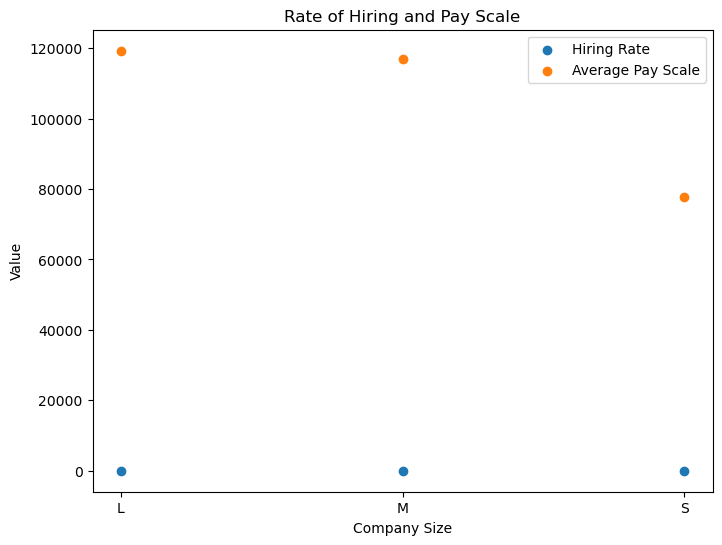

In [12]:
#Filtering columns that I need

filtered_salary = salary[['company_size', 'job_title', 'salary_in_usd', 'employment_type']]

# Calculating the rate of hiring and average pay scale by company size

hiring_rate = filtered_salary.groupby('company_size')['job_title'].count() / filtered_salary.groupby('company_size')['job_title'].nunique()

average_pay_scale = filtered_salary.groupby('company_size')['salary_in_usd'].mean()

# Graphing using a scatterplot

plt.figure(figsize=(8, 6))
plt.scatter(hiring_rate.index, hiring_rate.values, label='Hiring Rate')
plt.scatter(average_pay_scale.index, average_pay_scale.values, label='Average Pay Scale')
plt.xlabel('Company Size')
plt.ylabel('Value')
plt.title('Rate of Hiring and Pay Scale')
plt.legend()
plt.show()

# 8. What is the year over year (YoY) salary growth at different levels?

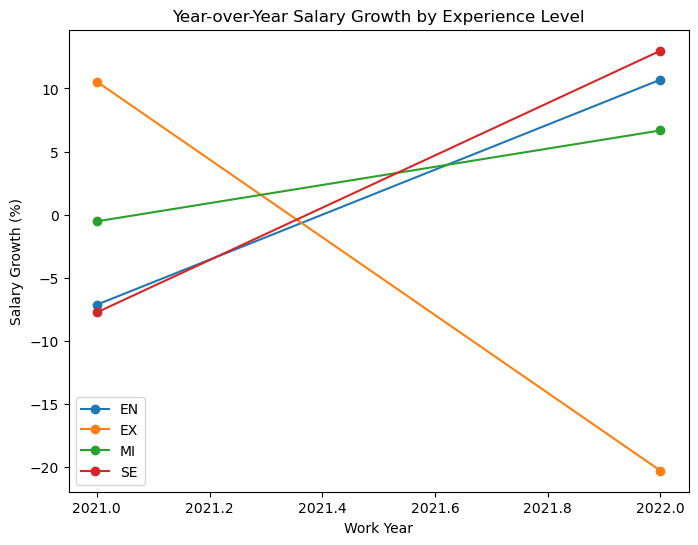

In [13]:
# Grouping the salary data by the level and year

grouped_salary = salary.groupby(['experience_level', 'work_year'])

# Calculating the average salary for each year within each group

average_salary_by_year = grouped_salary['salary_in_usd'].mean()

# Calculating the YoY salary growth

salary_growth = average_salary_by_year.groupby('experience_level').pct_change() * 100

# Reset the index of salary_growth

salary_growth = salary_growth.reset_index()

# Graphing using a line graph

plt.figure(figsize=(8, 6))
for level in salary_growth['experience_level'].unique():
    data = salary_growth[salary_growth['experience_level'] == level]
    plt.plot(data['work_year'], data['salary_in_usd'], marker='o', linestyle='-', label=level)
plt.xlabel('Work Year')
plt.ylabel('Salary Growth (%)')
plt.title('Year-over-Year Salary Growth by Experience Level')
plt.legend()
plt.show()